Based on SciKit-Learn Tutorial https://www.youtube.com/watch?v=0Lt9w-BxKFQ

In [1]:
# Supervised Learning Survey 07/20/2021
# https://www.ibm.com/cloud/learn/supervised-learning
# https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/
# Red Wine Dataset

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import time
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn import svm

from sklearn.model_selection import cross_val_score # 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV    # 
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import ensemble

from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve # 
from sklearn.model_selection import ShuffleSplit




from timeit import default_timer as my_timer
%matplotlib inline

In [2]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [3]:
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
b_cancer = pd.read_csv("datasets/breast_cancer_wisconsin_data.csv", sep=',')

In [4]:
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
b_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
b_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
b_cancer['diagnosis'].replace('B',0)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    0
Name: diagnosis, Length: 569, dtype: object

In [9]:
b_cancer['diagnosis'].replace('M',1)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    B
Name: diagnosis, Length: 569, dtype: object

In [10]:
b_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
b_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


/opt/anaconda3/envs/ml-env-py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

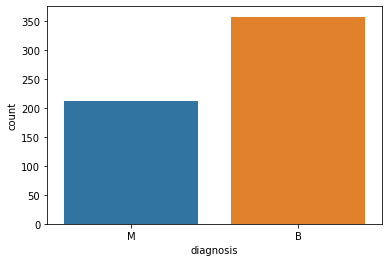

In [12]:
sns.countplot(b_cancer['diagnosis'])

In [13]:
# separation of the datasets
X_c = b_cancer.drop(['id','diagnosis','Unnamed: 32'], axis=1)
Y_c = b_cancer['diagnosis']
X_c.head()
Y_c.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [14]:
X_c.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X_c.shape

(569, 30)

In [16]:
Y_c.replace(['M','B'],[1,0], inplace=True)

In [17]:
Y_c

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [18]:
columns = X_c.columns.tolist()
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [19]:
Y_c.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

/opt/anaconda3/envs/ml-env-py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

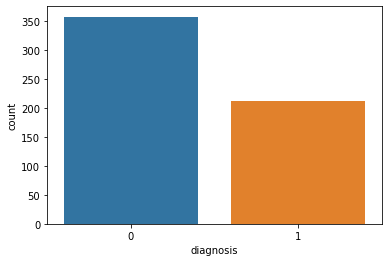

In [20]:
sns.countplot(Y_c)

In [21]:
Y_c.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [22]:
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#
test_train_size = 0.25
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=test_train_size, train_size=test_train_size, random_state = 1)
X_train_c_raw, X_test_c_raw, Y_train_c_raw, Y_test_c_raw = train_test_split(X_c, Y_c, test_size=test_train_size, train_size=test_train_size, random_state = 1)  

In [23]:
# scaling using StandardScaler:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler
sc=StandardScaler()
X_train_c = sc.fit_transform(X_train_c)
X_test_c = sc.transform(X_test_c)

In [24]:
X_train_c[:5]

array([[ 3.69827026e-01,  3.18407859e+00,  5.41058600e-01,
         2.38744569e-01,  5.97455194e-01,  2.07282011e+00,
         2.23139731e+00,  1.30397912e+00,  1.24944608e+00,
         1.30502662e+00, -5.42244134e-01, -2.36376324e-02,
        -2.50413375e-01, -4.16501165e-01, -6.51810802e-01,
         1.29154897e+00,  1.62070492e+00,  6.59416242e-01,
         1.14858209e-01,  1.06651367e+00,  3.10943648e-01,
         3.21909537e+00,  7.07525469e-01,  1.03314250e-01,
         5.01784300e-01,  3.51872339e+00,  4.38737156e+00,
         1.89876614e+00,  2.14317847e+00,  3.49110135e+00],
       [ 2.92468490e-01,  1.75184427e-02,  2.64492194e-01,
         1.48450589e-01, -4.01681267e-01, -1.09037670e-01,
        -3.61572496e-01,  3.64949174e-02,  2.80823341e-01,
        -5.91781539e-01, -4.30273020e-01, -4.58453781e-01,
        -3.59329438e-01, -3.58038276e-01, -4.50833235e-01,
        -2.68873950e-01, -6.70411384e-01,  4.27830867e-03,
        -5.97590642e-01, -4.26440255e-01,  3.74509396e-

**Improved Hyper Parameter Tuning for Decision Tree - Wisconsin Cancer Data**

In [25]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
# Use GridSearchCV
clf_dct_grds_c = GridSearchCV(DecisionTreeClassifier(random_state=0), {
                                                    'criterion':('gini', 'entropy'),
                                                    'splitter': ('best', 'random'), 
                                                    'max_depth': [1,2,5,7,10,20],
                                                    'min_samples_leaf': [1,5,10,20,50],
                                                    'ccp_alpha': [0.0001,0.001,0.01,0.1]
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_dct_grds_c.fit(X_train_c,Y_train_c)
#clf_dct_grds_c.fit(X,Y)
#clf_dct_grds.cv_results_
end_time = my_timer()
print("Decision Tree Grid Search Run time=", end_time-start_time)
print("Decision Tree Grid Search Results=", clf_dct_grds_c.cv_results_)

Decision Tree Grid Search Run time= 5.145515522104688
Decision Tree Grid Search Results= {'mean_fit_time': array([0.0090661 , 0.00146017, 0.00251455, 0.0011344 , 0.00159287,
       0.00092363, 0.00155935, 0.00094037, 0.00110669, 0.00086274,
       0.00137415, 0.00104351, 0.00149279, 0.00111613, 0.00129075,
       0.00091844, 0.00127473, 0.0009757 , 0.00111141, 0.0008944 ,
       0.00153627, 0.00094738, 0.00148482, 0.00118651, 0.0014308 ,
       0.00107937, 0.00152993, 0.00095334, 0.001127  , 0.00122228,
       0.00168362, 0.00099568, 0.00148859, 0.00154247, 0.00134702,
       0.00094161, 0.00132041, 0.00092325, 0.00106688, 0.00088339,
       0.00153146, 0.00102057, 0.00143456, 0.00114503, 0.00135841,
       0.00118742, 0.00138822, 0.0011395 , 0.00115089, 0.00089245,
       0.00156112, 0.00098615, 0.00140395, 0.00132608, 0.00130124,
       0.00108161, 0.00125961, 0.00092626, 0.00107274, 0.00088644,
       0.00136471, 0.00111961, 0.00144539, 0.00096459, 0.00126162,
       0.00100179, 0.0

In [27]:
clf_dct_grds_c.best_params_

{'ccp_alpha': 0.0001,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'splitter': 'random'}

In [28]:
clf_dct_grds_c.best_score_

0.9642857142857142

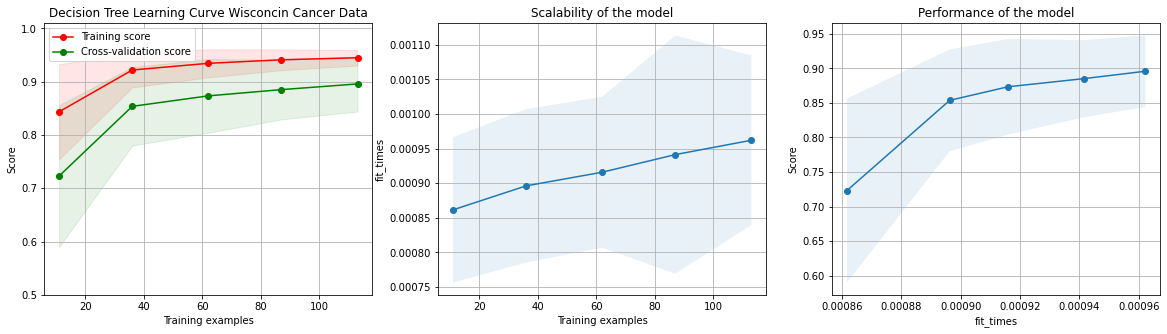

In [35]:
dct_best_c = clf_dct_grds_c.best_params_
dct_estimator_c = DecisionTreeClassifier(ccp_alpha=dct_best_c['ccp_alpha'],
                                       criterion=dct_best_c['criterion'],
                                       max_depth=dct_best_c['max_depth'],
                                       min_samples_leaf=dct_best_c['min_samples_leaf'],
                                       splitter=dct_best_c['splitter'])
dct_title_c = "Decision Tree Learning Curve Wisconcin Cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(dct_estimator_c, dct_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/dct_grds_best_cancer.png")
plt.show()

**Improved Hyper Parameter Tuning for SVM Wisconsin Cancer Data**

In [30]:
#Improved Hyper Parameter Tuning for SVM

# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/svm.html#svm
# Use GridSearchCV
clf_svm_grds_c = GridSearchCV(svm.SVC(random_state=1), {
                                                    'C': [1,10,20,50,100],
                                                    'kernel': ['rbf','linear', 'sigmoid'],
                                                    'gamma':[0.00001, 0.0001, 0.001]  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_svm_grds_c.fit(X_train_c,Y_train_c)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_svm_grds_c.cv_results_)


SVM Grid Search Run time= 0.5511416170047596
SVM Grid Search Results= {'mean_fit_time': array([0.00625205, 0.00115814, 0.00175939, 0.00167365, 0.00110645,
       0.00136909, 0.00138884, 0.00116072, 0.00133481, 0.0015029 ,
       0.00132508, 0.00144682, 0.00141878, 0.00119867, 0.00133138,
       0.0011528 , 0.00121346, 0.00134506, 0.00158353, 0.00122356,
       0.00138178, 0.00129662, 0.00117359, 0.00128145, 0.00138936,
       0.00114274, 0.00115733, 0.00143638, 0.00122085, 0.00140438,
       0.00124598, 0.00117078, 0.00131149, 0.00118032, 0.00129256,
       0.00117064, 0.00139313, 0.00126839, 0.00144477, 0.00131249,
       0.00121098, 0.00119171, 0.00112348, 0.00120034, 0.0012466 ]), 'std_fit_time': array([8.77006900e-03, 5.39754810e-05, 3.66304263e-04, 4.06708984e-04,
       3.89472348e-05, 4.45176969e-05, 4.20372997e-05, 9.42838141e-05,
       4.51203870e-05, 3.69379866e-05, 1.74239938e-04, 7.63606138e-05,
       1.32733205e-04, 7.50367473e-05, 4.51885671e-05, 7.24792480e-06,
       

In [31]:
clf_svm_grds_c.best_params_

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

In [32]:
clf_svm_grds_c.best_score_

0.9645320197044336

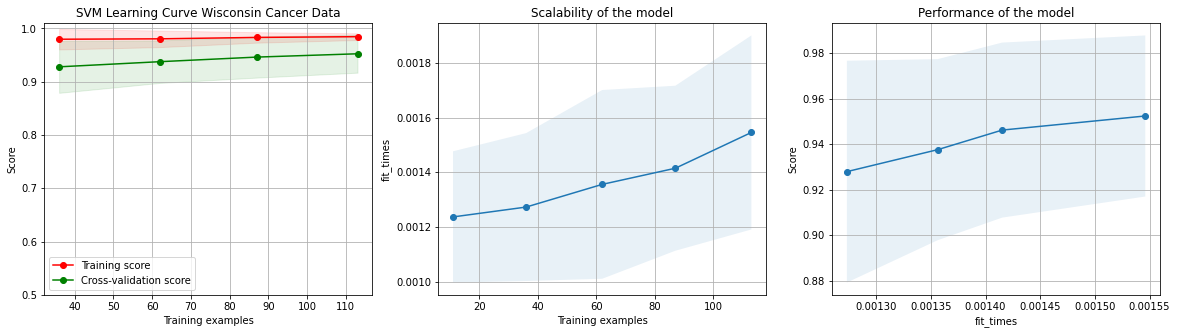

In [34]:
svm_best_c = clf_svm_grds_c.best_params_
svm_estimator_c = svm.SVC(C=svm_best_c['C'],
                        gamma=svm_best_c['gamma'],
                        kernel=svm_best_c['kernel'],
                        random_state=1)
svm_title_c = "SVM Learning Curve Wisconsin Cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(svm_estimator_c, svm_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/svm_grds_best_cancer.png")
plt.show()

**Improved Hyper Parameter Tuning for Neural Networks Wisconsin Cancer Data**

In [36]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
# Use GridSearchCV
clf_nn_grds_c = GridSearchCV(MLPClassifier(random_state=0),{
                                                    'max_iter': [2000,2500],
                                                    'solver': ['sgd','adam'],
                                                    'alpha':[0.00001, 0.0001, 0.001],
                                                    'power_t': [0.4,0.5, 0.6],
                                                    'activation':['relu', 'tanh', 'logistic']  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_nn_grds_c.fit(X_train_c,Y_train_c)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("Neural Networks Grid Search Run time=", end_time-start_time)
print("Neural Networks Grid Search Results=", clf_nn_grds_c.cv_results_)

Neural Networks Grid Search Run time= 243.71748856303748
Neural Networks Grid Search Results= {'mean_fit_time': array([0.3954246 , 0.24335985, 0.40716252, 0.2191308 , 0.42471285,
       0.22939792, 0.45951419, 0.25255575, 0.4633718 , 0.22745533,
       0.42518368, 0.25216246, 0.42132602, 0.26448197, 0.44031625,
       0.24163318, 0.43014421, 0.23028283, 0.41969819, 0.24072657,
       0.43840122, 0.23023405, 0.42405758, 0.23302493, 0.41529899,
       0.22312126, 0.43390694, 0.24335003, 0.44646382, 0.2734242 ,
       0.44043279, 0.26886463, 0.52451649, 0.22610645, 0.42977123,
       0.24959106, 0.44203482, 0.36326432, 0.41891379, 0.2705894 ,
       0.38073773, 0.36410232, 0.44712706, 0.31215672, 0.47071218,
       0.3492496 , 0.46541686, 0.32180662, 0.49839797, 0.31687322,
       0.50013819, 0.34574676, 0.42822313, 0.31995358, 0.36967888,
       0.250033  , 0.35608349, 0.26814218, 0.4206738 , 0.30010548,
       0.39748125, 0.26686645, 0.44285431, 0.40689306, 0.41620545,
       0.25475283

In [37]:
clf_nn_grds_c.best_params_

{'activation': 'tanh',
 'alpha': 1e-05,
 'max_iter': 2000,
 'power_t': 0.4,
 'solver': 'sgd'}

In [38]:
clf_nn_grds_c.best_score_

0.9716748768472907

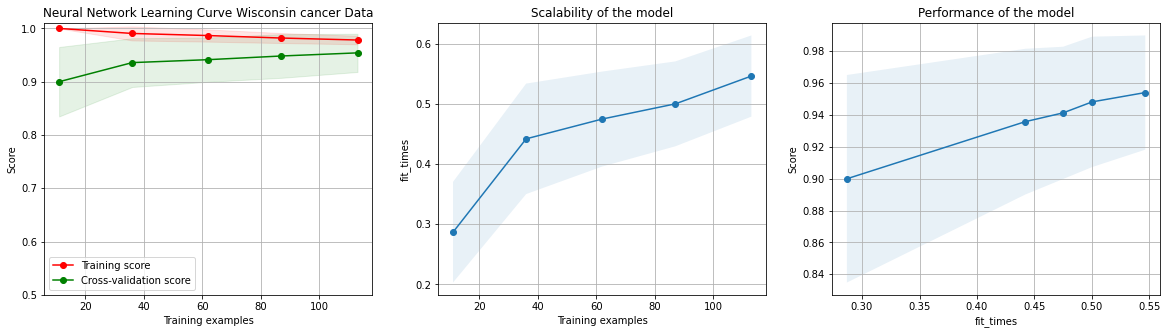

In [41]:
nn_best_c = clf_nn_grds_c.best_params_
nn_estimator_c = MLPClassifier(activation=nn_best_c['activation'],
                             alpha=nn_best_c['alpha'],
                             max_iter=nn_best_c['max_iter'],
                             power_t=nn_best_c['power_t'],
                             solver=nn_best_c['solver'],
                             random_state=1)
nn_title_c = "Neural Network Learning Curve Wisconsin cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(nn_estimator_c, nn_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/nn_grds_best_cancer.png")
plt.show()

**Improved Hyper Parameter Tuning for Boosting**

In [42]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
# Use GridSearchCV
clf_boos_grds_c = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=1), {
                                                    'n_estimators': [10,50,100,200,300,500, 1000],
                                                    'learning_rate': [0.1,0.2,0.5, 1.0, 1.2, 1.5, 2.0]
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_boos_grds_c.fit(X_train_c,Y_train_c)
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_boos_grds_c.cv_results_)

SVM Grid Search Run time= 140.669197105919
SVM Grid Search Results= {'mean_fit_time': array([0.02030549, 0.08894887, 0.18318558, 0.35119267, 0.52064276,
       0.87341018, 1.7522614 , 0.01786489, 0.08739619, 0.17448707,
       0.35089912, 0.57256145, 0.90158296, 1.74342537, 0.01898055,
       0.09070907, 0.17965536, 0.36084199, 0.54898324, 0.86331782,
       1.71989532, 0.01859322, 0.09322481, 0.17617254, 0.35025334,
       0.53547535, 0.84314461, 1.64172025, 0.01832395, 0.08696423,
       0.17489815, 0.35278883, 0.52049351, 0.84644966, 1.59237299,
       0.01840806, 0.08631544, 0.17309904, 0.34451203, 0.49396329,
       0.79662747, 1.63093982, 0.01813121, 0.09765253, 0.17333112,
       0.3299881 , 0.48019443, 0.77143159, 1.53965216]), 'std_fit_time': array([0.00325627, 0.00230047, 0.00710351, 0.00607046, 0.00767513,
       0.01115065, 0.04535652, 0.0002464 , 0.00180531, 0.00360991,
       0.00947228, 0.03208584, 0.03626119, 0.03068035, 0.00042899,
       0.00228105, 0.00265202, 0.0129

In [43]:
clf_boos_grds_c.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [44]:
clf_boos_grds_c.best_score_

0.9716748768472907

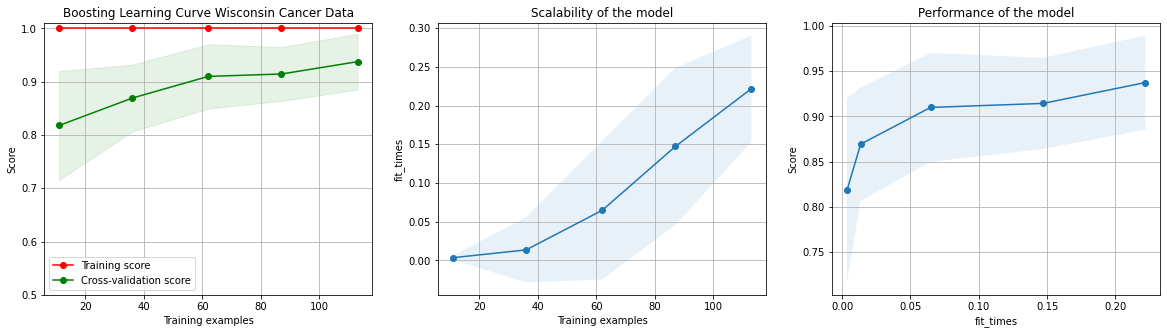

In [45]:
boos_best_c = clf_boos_grds_c.best_params_
boos_estimator_c = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                                   learning_rate=boos_best_c['learning_rate'], 
                                   n_estimators=boos_best_c['n_estimators'],
                                   random_state=1)
                
boos_title_c = "Boosting Learning Curve Wisconsin Cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(boos_estimator_c, boos_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/nn_grds_best_cancer.png")
plt.show()

**Improved Hyper Parameter Tuning for KNN Wisconsin Cancer Data**

In [46]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier 
# Use GridSearchCV
clf_knn_grds_c = GridSearchCV(KNeighborsClassifier(), {
                                                    'n_neighbors': [1,5,7,10,20],
                                                    'weights':['uniform', 'distance'],
                                                    'leaf_size': [1,2,5,10,20,30,40],
                                                    'algorithm':['ball_tree','kd_tree','brute'] 
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_knn_grds_c.fit(X_train_c,Y_train_c)
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_knn_grds_c.cv_results_)

SVM Grid Search Run time= 3.185798804042861
SVM Grid Search Results= {'mean_fit_time': array([0.00135164, 0.00120907, 0.00135527, 0.00099697, 0.00088749,
       0.00085211, 0.00097103, 0.00100889, 0.00081182, 0.00081196,
       0.00082207, 0.0007472 , 0.00078168, 0.00087628, 0.00076895,
       0.00095086, 0.00084896, 0.00091367, 0.00075722, 0.00078077,
       0.00074248, 0.00074468, 0.00101151, 0.00082879, 0.00098457,
       0.00094204, 0.00083957, 0.00081077, 0.00084038, 0.00077939,
       0.00085211, 0.00080948, 0.00077333, 0.00076847, 0.00073776,
       0.00074253, 0.00093017, 0.00074601, 0.00073195, 0.00077581,
       0.00084   , 0.00080357, 0.00083127, 0.0007853 , 0.00081758,
       0.00076933, 0.00079212, 0.00072079, 0.00077896, 0.00088935,
       0.00085154, 0.00077906, 0.00075817, 0.00081406, 0.00083537,
       0.00084324, 0.00075703, 0.00077686, 0.00080299, 0.00083084,
       0.00073466, 0.00069547, 0.00072103, 0.00071039, 0.00071077,
       0.00069823, 0.00069561, 0.00072579,

In [47]:
clf_knn_grds_c.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 5,
 'weights': 'uniform'}

In [48]:
clf_knn_grds_c.best_score_

0.9502463054187192

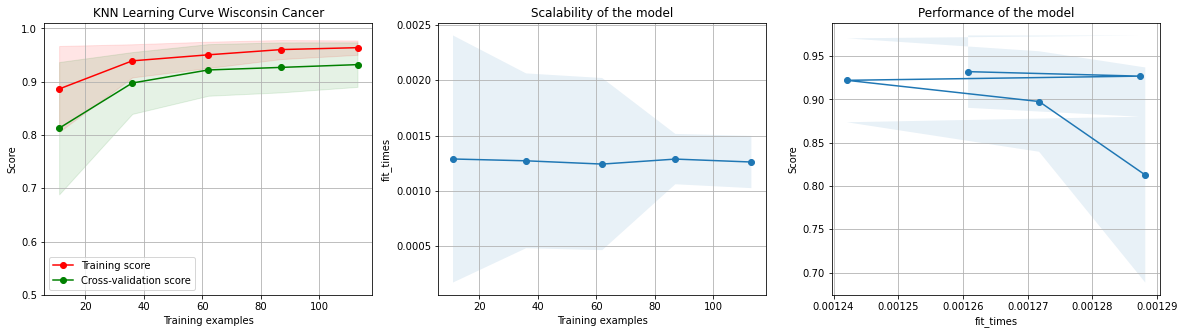

In [49]:
knn_best_c = clf_knn_grds_c.best_params_
knn_estimator_c = KNeighborsClassifier( n_neighbors=knn_best_c['n_neighbors'],
                                      weights=knn_best_c['weights'],
                                      leaf_size=knn_best_c['leaf_size'],
                                      algorithm=knn_best_c['algorithm']) 
                                
                
knn_title_c = "KNN Learning Curve Wisconsin Cancer"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(knn_estimator_c, knn_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/knn_grds_best_cancer.png")
plt.show()